**Introduction**:Personality traits like extroversion and introversion shape how individuals interact with their social environments. This dataset provides insights into behaviors such as time spent alone, social event attendance, and social media engagement, enabling applications in psychology, sociology, marketing, and machine learning.

**Dataset link**: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data

**Dataset description**:

1.**Time_spent_Alone**:Number of hours an individual typically spends alone daily.
2.**Stage_fear**:Whether the person experiences stage fear
3.**Social_event_attendance**:Frequency (scale 0-10) of attending social events.
4.**Going_outside**:How often the individual goes outside (scale 0-10).
5.**Drained_after_socializing**:Whether the individual feels drained after socializing.
6.**Friends_circle_size**:Number of close friends.
7.**Post_frequency**:Frequency of posting on social media.
8.**Personality**:Target variable: Introvert or Extrovert.

In [99]:
#Importing Libraries

import numpy as np #for numerical computing
import pandas as pd #for data analysis and data manipulation
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
from sklearn.model_selection import KFold #for cross validation
from sklearn.preprocessing import LabelEncoder #to convert categorical values into numerical values
from sklearn.model_selection import train_test_split #for training and testing
from sklearn.ensemble import RandomForestClassifier #Classifier Algorithm
from sklearn.linear_model import LogisticRegression #calssifier algorithm
from sklearn.svm import SVC #Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier #Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier #Classifier Algorithm
from sklearn.ensemble import AdaBoostClassifier #Classifier Algorithm
from xgboost import XGBClassifier #for classifier Algorithm
from sklearn.neural_network import MLPClassifier #Classifier Algorithm
from sklearn.metrics import confusion_matrix,recall_score,f1_score #evaluation of classification models
from sklearn.model_selection import cross_val_score #for cross validation
import time
import warnings
warnings.filterwarnings('ignore')

In [100]:
data=pd.read_csv('/content/personality_dataset.csv') #reading the csv file

In [101]:
data.isnull().sum() #finding the null values present in the dataset

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [102]:
data.shape #rows and columns in the dataset

(2900, 8)

In [103]:
data.head(3) #First 3 rows and columns of dataset

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert


In [104]:
data.info() #information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [105]:
data.describe() #Description of the data

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [106]:
data['Time_spent_Alone']=data['Time_spent_Alone'].fillna(data['Time_spent_Alone'].mean())#filling the null values...when it is categorical data we will use mode and in numerical data we will use mean
data['Stage_fear']=data['Stage_fear'].fillna(data['Stage_fear'].mode()[0])
data['Social_event_attendance']=data['Social_event_attendance'].fillna(data['Social_event_attendance'].mean())
data['Going_outside']=data['Going_outside'].fillna(data['Going_outside'].mean())
data['Drained_after_socializing']=data['Drained_after_socializing'].fillna(data['Drained_after_socializing'].mode()[0])
data['Friends_circle_size']=data['Friends_circle_size'].fillna(data['Friends_circle_size'].mean())
data['Post_frequency']=data['Post_frequency'].fillna(data['Post_frequency'].mean())
data['Personality']=data['Personality'].fillna(data['Personality'].mode()[0])

In [107]:
data.isnull().sum() #how many null values are present in the dataset

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [108]:
correlation=data.corr(numeric_only=True) #finding the realtionship between different numerical values

In [109]:
correlation

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.718139,-0.735247,-0.701665,-0.718072
Social_event_attendance,-0.718139,1.000000,0.731941,0.718518,0.727732
Going_outside,-0.735247,0.731941,1.000000,0.718327,0.754758
Friends_circle_size,-0.701665,0.718518,0.718327,1.000000,0.690381
Post_frequency,-0.718072,0.727732,0.754758,0.690381,1.000000


Univariate Analysis

Text(0.5, 1.0, 'Distribution of Time_spent_Alone')

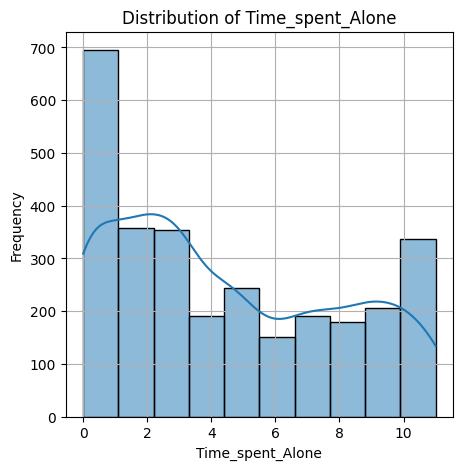

In [110]:
plt.figure(figsize=(5,5))
sns.histplot(data['Time_spent_Alone'],bins=10,kde=True)
plt.xlabel('Time_spent_Alone')
plt.ylabel('Frequency')
plt.grid(True)
plt.title('Distribution of Time_spent_Alone')

The Distribution of Time spent alone shows that most people don't want to spend time alone and the least people want to spend time alone is 6 hrs.

This plot shows that how many people are in stage fear


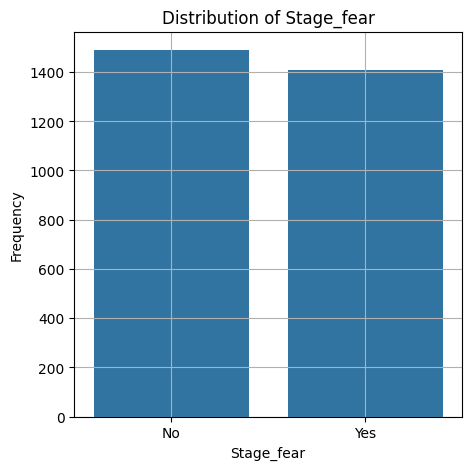

In [111]:
plt.figure(figsize=(5,5))
sns.countplot(x='Stage_fear',data=data)
plt.xlabel('Stage_fear')
plt.ylabel('Frequency')
plt.title('Distribution of Stage_fear')
plt.grid(True)
print('This plot shows that how many people are in stage fear')

This graph shows that most people don't have stage fear and some people do have stage fear i.e. more than 1400 people

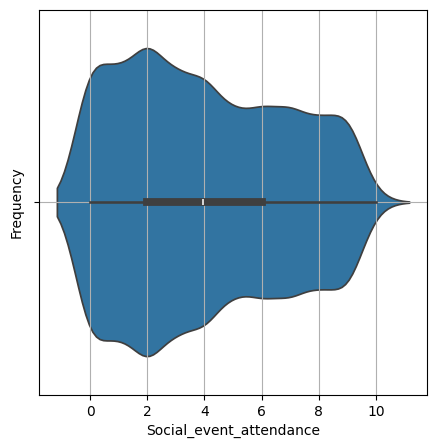

In [112]:
plt.figure(figsize=(5,5))
sns.violinplot(x='Social_event_attendance',data=data)
plt.xlabel('Social_event_attendance')
plt.ylabel('Frequency')
plt.grid(True)

This violin plot shows that most people have 2 out of 10 as social event attendance i.e. most people don't like to attend social events.

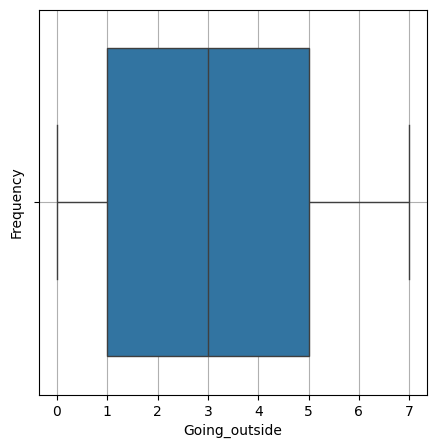

In [113]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Going_outside',data=data)
plt.xlabel('Going_outside')
plt.ylabel('Frequency')
plt.grid(True)

There is no outliers in this boxplot and most people like going outside

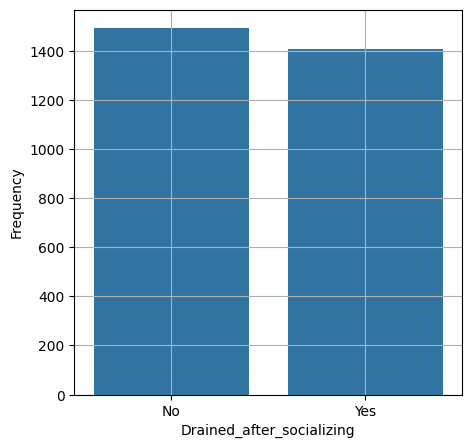

In [114]:
plt.figure(figsize=(5,5))
sns.countplot(x='Drained_after_socializing',data=data)
plt.xlabel('Drained_after_socializing')
plt.ylabel('Frequency')
plt.grid(True)

max people do not get drained after socializing but some people do i.e. more than 1400

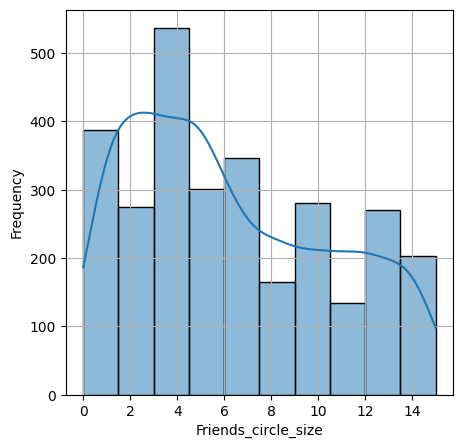

In [115]:
plt.figure(figsize=(5,5))
sns.histplot(data['Friends_circle_size'],bins=10,kde=True)
plt.xlabel('Friends_circle_size')
plt.ylabel('Frequency')
plt.grid(True)

Most people have 2-4 people in their friend circle

**Bivariate Analysis**

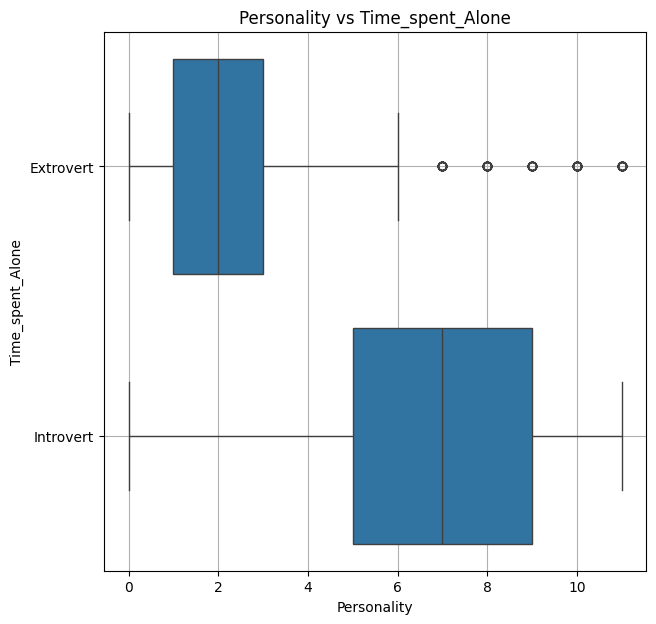

In [116]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Time_spent_Alone',y='Personality',data=data)
plt.xlabel('Personality')
plt.ylabel('Time_spent_Alone')
plt.title('Personality vs Time_spent_Alone')
plt.grid(True)

This boxplot shows the realtionship between personality and time spent alone. Introverts prefer spending time alone whether exteroverts don't like more spending alone.

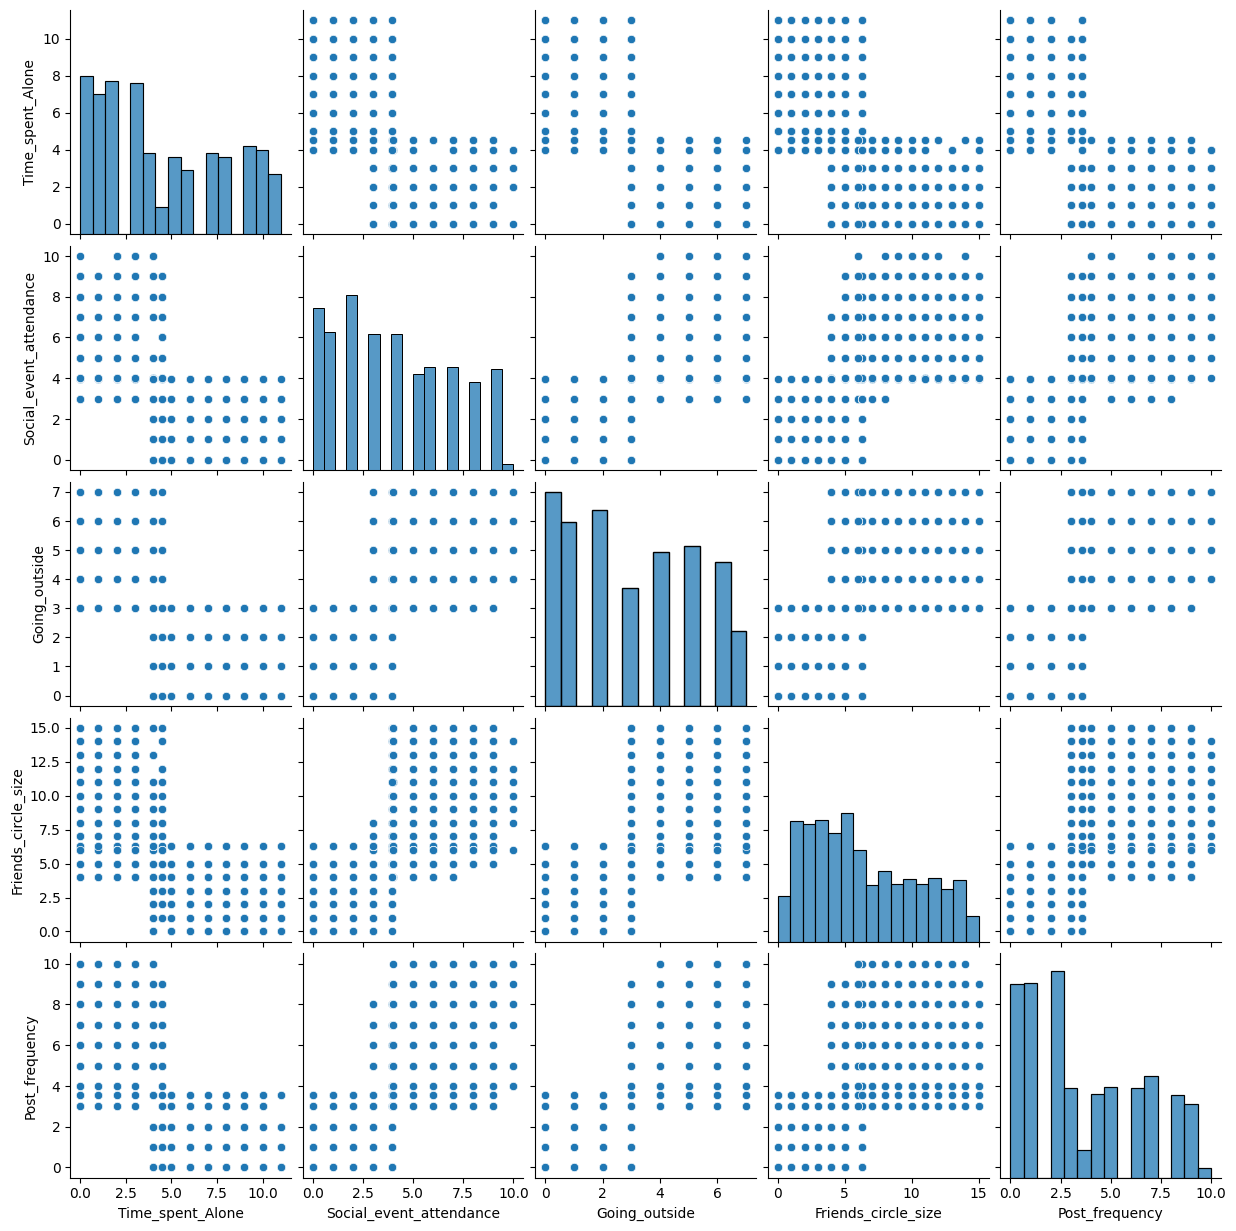

In [117]:
sns.pairplot(data)

Pairplot shows the various graphs realted to dataset

<Axes: xlabel='Drained_after_socializing', ylabel='Time_spent_Alone'>

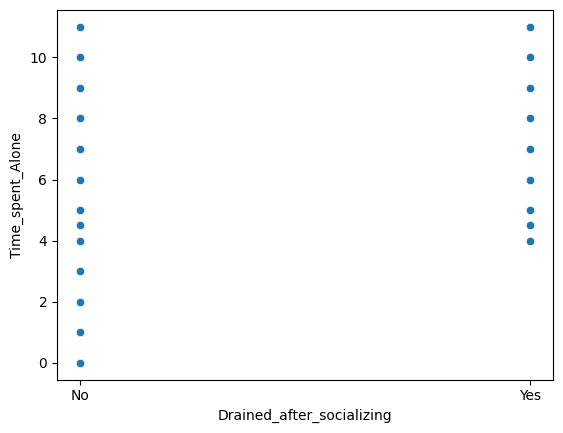

In [118]:
sns.scatterplot(y='Time_spent_Alone',x='Drained_after_socializing',data=data)

The more they spend time alone, more they are drained after socializing.

Text(0.5, 1.0, 'Correlation Heatmap')

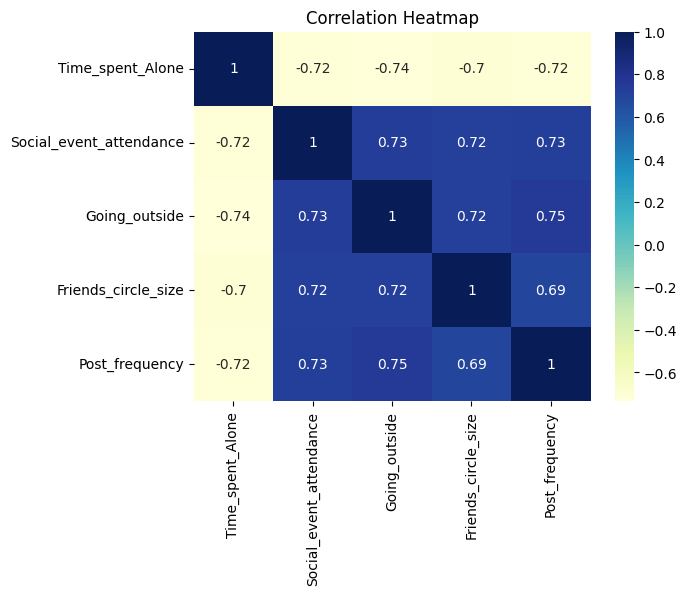

In [119]:
sns.heatmap(correlation,annot=True,cmap='YlGnBu')
plt.title('Correlation Heatmap')

Here darker shades shows highly positive correlation like they are highly correleated. Lighter shades shows negative correlation i.e. if one variable is increasing other is decreasing.
Here we can see that 'going outside' and 'post frequency' are highly correlated.

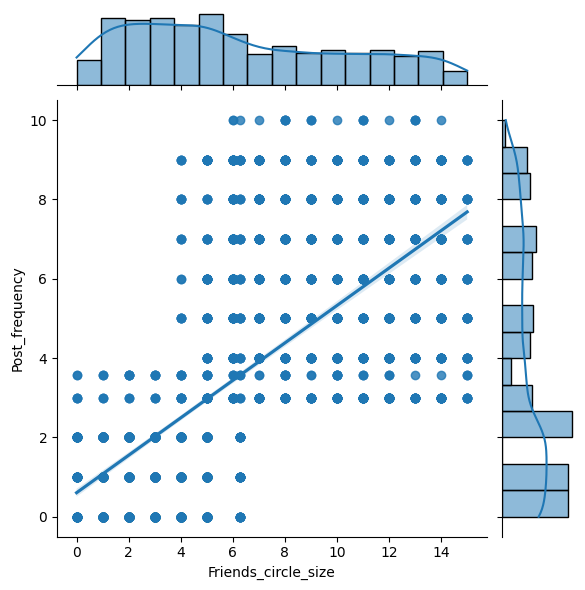

In [120]:
sns.jointplot(x='Friends_circle_size', y='Post_frequency', data=data, kind='reg')
plt.show()

This is the realtionship between 'post frequency' and 'friends circle size'. it is a linear realtionship means the more they have friend circle size, the more they have post frequency.

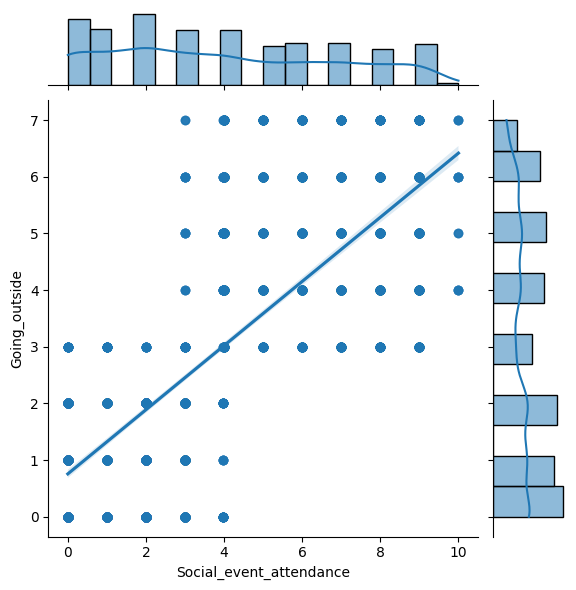

In [121]:
sns.jointplot(x='Social_event_attendance',y='Going_outside',data=data,kind='reg')

The above graoh shows that the people who are more likely to go outside, they are more likely to be present in social event as the graph shows linear realtionship.

In [122]:
data.head(2)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert


In [123]:
le = LabelEncoder() #Now converting the categorical values to numerical values for easier and more accurate interpretations
data['Drained_after_socializing']=le.fit_transform(data['Drained_after_socializing'])
data['Personality']=le.fit_transform(data['Personality'])
data['Stage_fear']=le.fit_transform(data['Stage_fear'])

In [124]:
data.head(2)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1


In [125]:
x=data.drop(columns=['Personality'],axis=1) #Now dividing the data into x and y
y=data['Personality']

Splitting the data into training and testing data

In [126]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Logistic Regression

In [127]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)

RandomForest Classifier

In [128]:
rdc=RandomForestClassifier()
rdc.fit(X_train,Y_train)
y_pred_rdc=rdc.predict(X_test)

SVM

In [129]:
sv=SVC()
sv.fit(X_train,Y_train)
svc_pred=sv.predict(X_test)

Decision Tree Classifier

In [130]:
dr=DecisionTreeClassifier()
dr.fit(X_train,Y_train)
y_pred_dr=dr.predict(X_test)

AdaBoost Classifier

In [131]:
abr=AdaBoostClassifier()
abr.fit(X_train,Y_train)
y_pred_abr=abr.predict(X_test)

XGBClassifier

In [132]:
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
y_pred_xgb=xgb.predict(X_test)

Multilayer Perceptron(Neural Network)

In [133]:
mlp=MLPClassifier()
mlp.fit(X_train,Y_train)
y_pred_mlp=mlp.predict(X_test)

In [137]:
print('Logistic Regression')
recall_1=recall_score(Y_test,y_pred)
confusion_1=confusion_matrix(Y_test,y_pred)
f_1=f1_score(Y_test,y_pred)
cross_1=cross_val_score(lr,X_train,Y_train,cv=5)
start_time_1 = time.time()
print('Recall: ',recall_1)
print('Confusion: ',confusion_1)
print('F1 Score: ',f_1)
print('Cross Validation Score: ',cross_1)
print('Time taken: ',time.time()-start_time_1)

print('Random Forest')
recall_2=recall_score(Y_test,y_pred_rdc)
cross_2=cross_val_score(rdc,x,y,cv=5)
print('Cross Validation Score: ',cross_2)
confusion_2=confusion_matrix(Y_test,y_pred_rdc)
f_2=f1_score(Y_test,y_pred_rdc)
start_time_2= time.time()
print('Recall: ',recall_2)
print('Confusion: ',confusion_2)
print('F1 score: ',f_2)
print('Time taken: ',time.time()-start_time_2)

print('SVM')
recall_3=recall_score(Y_test,svc_pred)
confusion_3=confusion_matrix(Y_test,svc_pred)
f_3=f1_score(Y_test,svc_pred)
start_time_3 = time.time()
print('Recall: ',recall_3)
print('Confusion: ',confusion_3)
print('F1 score: ',f_3)
print('Time taken: ',time.time()-start_time_3)


print('Decision Tree')
recall_4=recall_score(Y_test,y_pred_dr)
confusion_4=confusion_matrix(Y_test,y_pred)
f_4=f1_score(Y_test,y_pred_dr)
cross_2=cross_val_score(dr,x,y,cv=5)
start_time_4 = time.time()
print('Cross Validation Score: ',cross_2)
print('Recall: ',recall_4)
print('Confusion: ',confusion_4)
print('F1 score: ',f_4)
print('Time taken: ',time.time()-start_time_4)

print('AdaBoost')
recall_5=recall_score(Y_test,y_pred_abr)
confusion_5=confusion_matrix(Y_test,y_pred_abr)
f_5=f1_score(Y_test,y_pred_abr)
cross_5=cross_val_score(abr,x,y,cv=5)
start_time_5 = time.time()
print('Cross Validation Score: ',cross_5)
print('Recall: ',recall_5)
print('Confusion: ',confusion_5)
print('F1 score: ',f_5)
print('Time taken: ',time.time()-start_time_5)

print('XGB Classifier')
recall_6=recall_score(Y_test,y_pred_xgb)
confusion_6=confusion_matrix(Y_test,y_pred_xgb)
f_6=f1_score(Y_test,y_pred_xgb)
cross_6=cross_val_score(xgb,x,y,cv=5)
start_time_6 = time.time()
print('Cross Validation Score: ',cross_6)
print('F1 score: ',f_6)
print('Recall: ',recall_6)
print('Confusion: ',confusion_6)
print('Time taken: ',time.time()-start_time_6)

print('MLP Classifier')
recall_7=recall_score(Y_test,y_pred_mlp)
confusion_7=confusion_matrix(Y_test,y_pred_mlp)
f_7=f1_score(Y_test,y_pred_mlp)
cross_7=cross_val_score(mlp,x,y,cv=5)
start_time_7 = time.time()
print('Cross Validation Score: ',cross_7)
print('F1 score: ',f_7)
print('Recall: ',recall_7)
print('Confusion: ',confusion_7)
print('Time taken: ',time.time()-start_time_7)

Logistic Regression
Recall:  0.9280575539568345
Confusion:  [[278  24]
 [ 20 258]]
F1 Score:  0.9214285714285714
Cross Validation Score:  [0.92887931 0.90301724 0.93534483 0.93103448 0.94396552]
Time taken:  0.001283884048461914
Random Forest
Cross Validation Score:  [0.94137931 0.9137931  0.91724138 0.90862069 0.90172414]
Recall:  0.9280575539568345
Confusion:  [[277  25]
 [ 20 258]]
F1 score:  0.9197860962566845
Time taken:  0.0004565715789794922
SVM
Recall:  0.9388489208633094
Confusion:  [[278  24]
 [ 17 261]]
F1 score:  0.9271758436944938
Time taken:  0.00034356117248535156
Decision Tree
Cross Validation Score:  [0.87241379 0.84655172 0.85862069 0.87931034 0.86896552]
Recall:  0.8776978417266187
Confusion:  [[278  24]
 [ 20 258]]
F1 score:  0.8683274021352313
Time taken:  0.0005664825439453125
AdaBoost
Cross Validation Score:  [0.93103448 0.92758621 0.91724138 0.90517241 0.89827586]
Recall:  0.9172661870503597
Confusion:  [[278  24]
 [ 23 255]]
F1 score:  0.9156193895870736
Time t

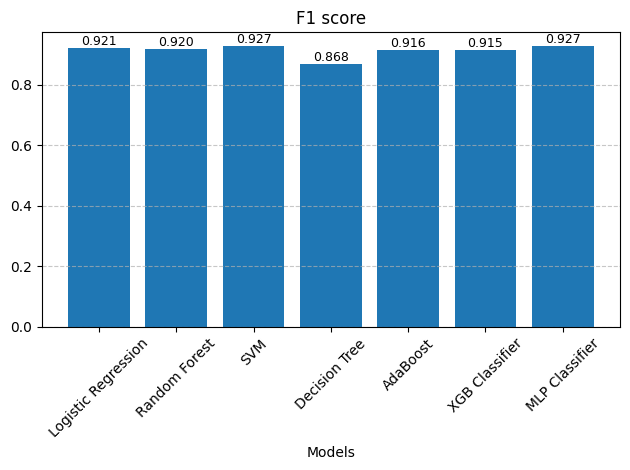

In [149]:
categories = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'AdaBoost', 'XGB Classifier', 'MLP Classifier']
values = [0.9214285714285714, 0.9197860962566845, 0.9271758436944938, 0.8683274021352313, 0.9156193895870736, 0.9148936170212766, 0.9271758436944938]

bars = plt.bar(categories, values)

# Label on top of each bar with 3 decimal places
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{height:.3f}',   # formatted value as label
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Models')
plt.title('F1 score')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Prevent label cutoff
plt.show()

**Observation**

**F1 Score**: According to F1 score we can see that SVM and MLP classifier have the best score followed by Logistic Regression.
Least score has decision tree.

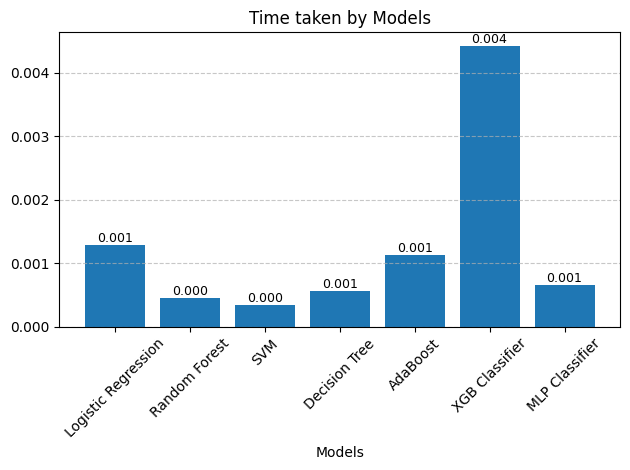

In [148]:
categories = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'AdaBoost', 'XGB Classifier', 'MLP Classifier']
values = [0.001283884048461914,  0.0004565715789794922,  0.00034356117248535156, 0.0005664825439453125,  0.0011267662048339844, 0.004412174224853516,0.0006575584411621094]

bars = plt.bar(categories, values)

# Label on top of each bar with 3 decimal places
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{height:.3f}',   # formatted value as label
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Models')
plt.title('Time taken by Models')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Prevent label cutoff
plt.show()

**Training time**: SVM takes the least time followed by random forest and decision trees.

**Conclusion**: For this classification task, SVM is the most accurate model, providing a good combination of high accuracy and reasonable computational cost. Random Forest also offers a balance of high accuracy and fast training time. The consistent high performance of these models across test confirms that the data preprocessing and feature engineering steps have successfully created a model which predicts who is introvert or extrovert.